In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [71]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [72]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [73]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [150]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

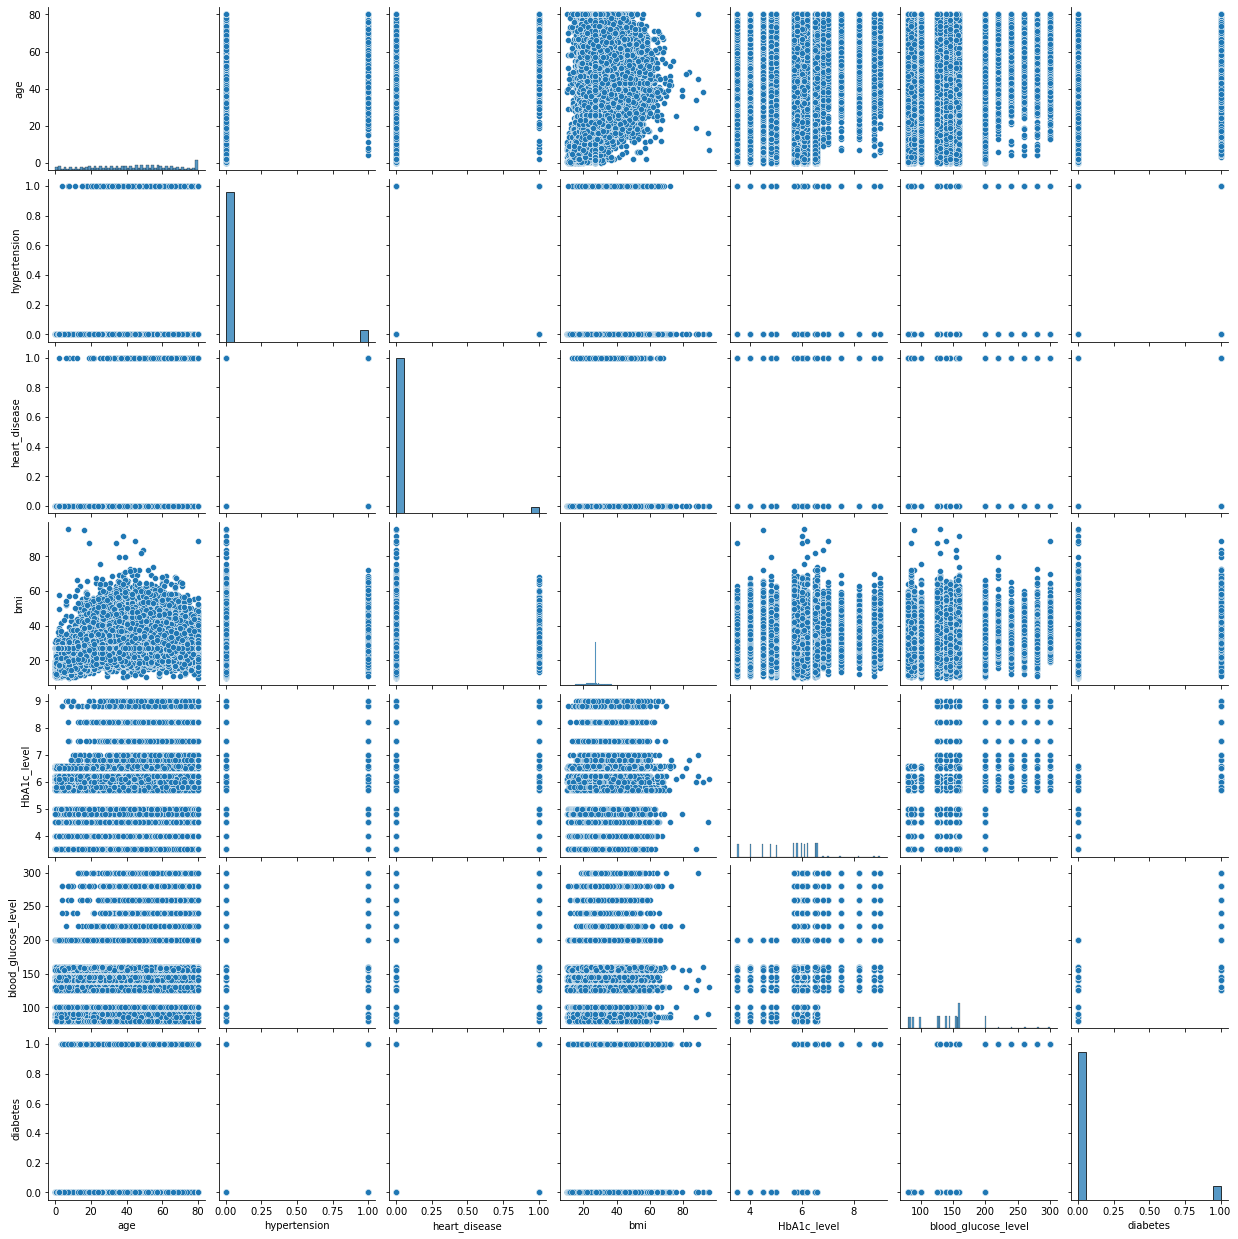

In [74]:
sns.pairplot(df)

<AxesSubplot:>

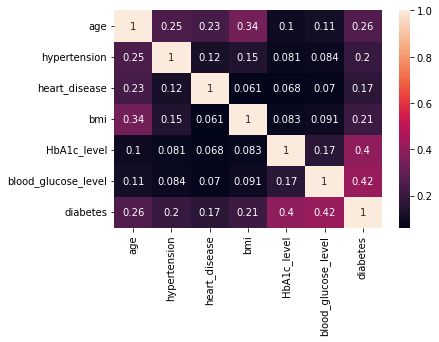

In [75]:
sns.heatmap(df.corr(),annot=True)

In [76]:

x=df.drop(["diabetes"],axis=1)

In [77]:
y=df["diabetes"]

In [78]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [81]:
x_cat=df[["gender","smoking_history"]]



In [83]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()

In [86]:
x_cat=pd.DataFrame(x_cat)

In [84]:
x_numeric=df[["age","hypertension","bmi","HbA1c_level","blood_glucose_level","heart_disease"]]

In [88]:
x_all=pd.concat([x_cat,x_numeric],axis=1)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x_all)
x

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[ 0.84135818, -0.8410462 , -0.01341762, ...,  1.00170572,
         0.04770422,  4.93637859],
       [ 0.84135818, -0.8410462 , -0.01341762, ...,  1.00170572,
        -1.42620999, -0.20257766],
       [-1.18855444,  1.18899532, -0.01341762, ...,  0.16110802,
         0.48987848, -0.20257766],
       ...,
       [-1.18855444,  1.18899532, -0.01341762, ...,  0.16110802,
         0.41618277, -0.20257766],
       [ 0.84135818, -0.8410462 , -0.01341762, ..., -1.42668764,
        -0.93490525, -0.20257766],
       [ 0.84135818, -0.8410462 , -0.01341762, ...,  1.00170572,
        -1.18055762, -0.20257766]])

In [93]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [107]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 96.09 %


<AxesSubplot:>

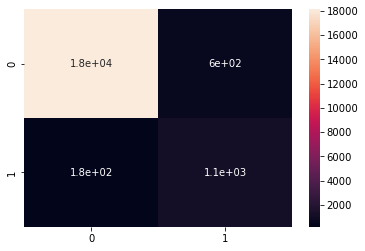

In [109]:

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)


In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.86      0.65      0.74      1703

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [ ]:
model.predict()

# Random Forest Classification

In [112]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [114]:
y_pred1=classifier.predict(X_test)

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred1, y_test)))


Accuracy 97.00999999999999 %


<AxesSubplot:>

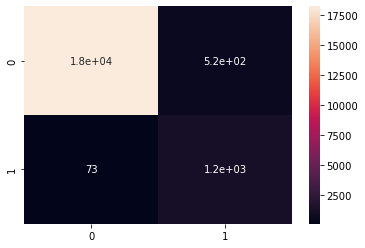

In [116]:
cm = confusion_matrix(y_pred1, y_test)
sns.heatmap(cm, annot=True)

In [117]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.94      0.69      0.80      1703

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



# Using svc

In [118]:
from sklearn.svm import SVC

In [120]:
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

In [121]:
y_pred2=classifier2.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred2, y_test)))

Accuracy 96.155 %


<AxesSubplot:>

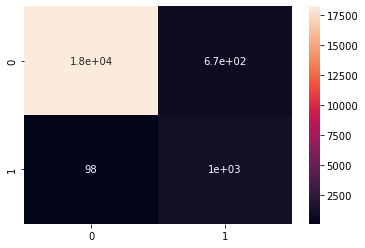

In [123]:
# Testing Set Performance
cm = confusion_matrix(y_pred2, y_test)
sns.heatmap(cm, annot=True)

In [124]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18297
           1       0.91      0.61      0.73      1703

    accuracy                           0.96     20000
   macro avg       0.94      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



# Using Naive Bayes

In [126]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

GaussianNB()

In [127]:
y_pred3=classifier3.predict(X_test)

In [128]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred3, y_test)))


Accuracy 30.09 %


<AxesSubplot:>

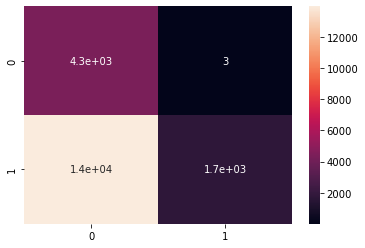

In [129]:
cm = confusion_matrix(y_pred3, y_test)
sns.heatmap(cm, annot=True)


In [130]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.24      0.38     18297
           1       0.11      1.00      0.20      1703

    accuracy                           0.30     20000
   macro avg       0.55      0.62      0.29     20000
weighted avg       0.92      0.30      0.37     20000



# Using Decision Tree Classifier

In [134]:
from sklearn.tree import DecisionTreeClassifier
Classifier4 = DecisionTreeClassifier(random_state = 0)
Classifier4.fit(X, y)


DecisionTreeClassifier(random_state=0)

In [142]:
y_pred4=Classifier4.predict(X_test)

In [143]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred4, y_test)))


Accuracy 99.935 %


<AxesSubplot:>

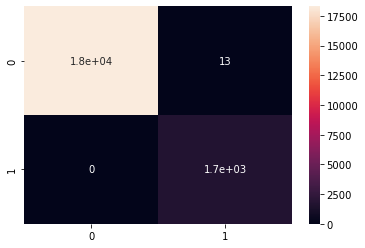

In [149]:
cm = confusion_matrix(y_pred4, y_test)
sns.heatmap(cm, annot=True)


In [148]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18297
           1       1.00      0.99      1.00      1703

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

